<a href="https://colab.research.google.com/github/sharvanitamaskar/Principle-Component-Analysis-using-Differential-Privacy/blob/main/PrivatePCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
from numpy.linalg import svd

In [3]:
from google.colab import files
uploaded = files.upload()


Saving u.data to u.data


In [4]:
df = pd.read_csv("u.data",sep='\t', header=None)

In [5]:
df.head(15)

,0,1,2,3
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [6]:
#preprocess
df.columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']
df = df.astype({
    'UserID': 'int',
    'MovieID': 'int',
    'Rating': 'int',
    'Timestamp': 'int'
})

print(df)

       UserID  MovieID  Rating  Timestamp
0         196      242       3  881250949
1         186      302       3  891717742
2          22      377       1  878887116
3         244       51       2  880606923
4         166      346       1  886397596
...       ...      ...     ...        ...
99995     880      476       3  880175444
99996     716      204       5  879795543
99997     276     1090       1  874795795
99998      13      225       2  882399156
99999      12      203       3  879959583

[100000 rows x 4 columns]


In [10]:
df['UserID'].unique()

array([196, 186,  22, 244, 166, 298, 115, 253, 305,   6,  62, 286, 200,
       210, 224, 303, 122, 194, 291, 234, 119, 167, 299, 308,  95,  38,
       102,  63, 160,  50, 301, 225, 290,  97, 157, 181, 278, 276,   7,
        10, 284, 201, 287, 246, 242, 249,  99, 178, 251,  81, 260,  25,
        59,  72,  87,  42, 292,  20,  13, 138,  60,  57, 223, 189, 243,
        92, 241, 254, 293, 127, 222, 267,  11,   8, 162, 279, 145,  28,
       135,  32,  90, 216, 250, 271, 265, 198, 168, 110,  58, 237,  94,
       128,  44, 264,  41,  82, 262, 174,  43,  84, 269, 259,  85, 213,
       121,  49, 155,  68, 172,  19, 268,   5,  80,  66,  18,  26, 130,
       256,   1,  56,  15, 207, 232,  52, 161, 148, 125,  83, 272, 151,
        54,  16,  91, 294, 229,  36,  70,  14, 295, 233, 214, 192, 100,
       307, 297, 193, 113, 275, 219, 218, 123, 158, 302,  23, 296,  33,
       154,  77, 270, 187, 170, 101, 184, 112, 133, 215,  69, 104, 240,
       144, 191,  61, 142, 177, 203,  21, 197, 134, 180, 236, 26

In [11]:
len(df['UserID'].unique())
# we have 953 uniqiue users whose uder ID ranges from 1->943

943

In [12]:
df['MovieID'].unique()

array([ 242,  302,  377, ..., 1637, 1630, 1641])

In [13]:
len(df['MovieID'].unique())
#each user has voted for atleast 20 movies

1682

In [14]:
df['UserID'].isnull().sum()
#check for nulls

0

In [15]:
df['MovieID'].isnull().sum()
#no null nulls present

0

In [16]:
df['Rating'].min()

1

In [17]:
df['Rating'].max()

5

In [7]:
df.UserID = df.UserID.astype('category').cat.codes.values
df.MovieID = df.MovieID.astype('category').cat.codes.values

In [8]:
df['UserID'].value_counts(ascending=True)

UserID
363     20
823     20
635     20
142     20
630     20
      ... 
275    518
449    540
12     636
654    685
404    737
Name: count, Length: 943, dtype: int64

In [9]:
df['MovieID'].unique()

array([ 241,  301,  376, ..., 1636, 1629, 1640], dtype=int16)

In [10]:
index=list(df['UserID'].unique())
columns=list(df['MovieID'].unique())
index=sorted(index)
columns=sorted(columns)

util_df=pd.pivot_table(data=df,values='Rating',index='UserID',columns='MovieID')

In [11]:
util_df
#nulls show the movies unrated by users

MovieID,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
UserID,,,,,,,,,,,,,,,,,,,,,
0,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
util_df=util_df.fillna(0)

In [13]:
util_df

MovieID,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
UserID,,,,,,,,,,,,,,,,,,,,,
0,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
939,0.0,0.0,0.0,2.0,0.0,0.0,4.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
class MatrixDataLoader:
  def __init__(self):
        self.A = None
  def load_dataset(self, df):
        self.A = df.values
  def generate_gaussian_matrix(self, rows, columns, mean=0, std_dev=1):
    #generates matrix with Gaussian distributed values.
    self.A = np.random.normal(mean, std_dev, (rows, columns))

loader = MatrixDataLoader()


In [15]:
loader.load_dataset(util_df)
print("Dataset loaded into matrix A:\n", loader.A)

Dataset loaded into matrix A:
 [[5. 3. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]]


In [27]:
loader.generate_gaussian_matrix(rows=100, columns=100, mean=0, std_dev=1)
print("Synthetic Gaussian matrix A:\n", loader.A)

Synthetic Gaussian matrix A:
 [[-1.05904015 -0.99834429  0.46090213 ...  0.29879808 -0.03222277
   0.32958912]
 [ 0.12877047 -0.62567229 -0.04791356 ...  1.00922594  0.01978668
  -1.72290255]
 [-0.21760132  0.68884607 -0.78866108 ... -0.89407309  0.4868169
  -2.27992548]
 ...
 [ 0.42813532  0.79551234  0.75449927 ... -0.37371464  1.54456252
  -0.28827463]
 [ 0.64341227 -0.26476494  1.86016422 ...  1.21012168  0.30455129
  -0.21330242]
 [-0.19155504  0.14921648 -0.50796026 ... -0.6540116  -0.06683677
  -0.97294611]]


In [16]:
Ag=loader.A

In [17]:
U, S, VT = np.linalg.svd(np.dot(Ag.T,Ag))
print("U:\n", U) #direction in the original space where your data lies.
print("Singular Values:", S) #contains the singular values of Ag
#square roots of the eigenvalues AgAg(t)
print("VT:\n", VT) #contains the right singular vectors of Ag
#captures features and pattersn of Ag

U:
 [[-9.59509371e-02  8.72397853e-02  1.69737618e-02 ... -5.53573924e-20
  -3.24584870e-19 -4.42647285e-19]
 [-3.51795155e-02  7.02505798e-03  6.25039193e-02 ... -6.02809101e-20
   1.57802582e-19 -3.94470036e-19]
 [-1.99288117e-02  2.86181725e-02  1.16405039e-02 ...  1.23525095e-19
  -3.53491761e-20 -4.12546605e-19]
 ...
 [-3.03747116e-05  4.48134760e-04 -5.33024145e-04 ... -2.19315423e-17
   2.73881426e-16  4.58708498e-16]
 [-3.31055915e-04 -1.05231342e-04  4.54336533e-04 ... -1.12492842e-17
   1.68595804e-16  2.77105146e-16]
 [-3.16852950e-04 -2.03151884e-04  2.61400068e-04 ...  8.17075339e-18
  -9.33176522e-17 -1.59007637e-16]]
Singular Values: [4.10411438e+05 5.99448362e+04 4.74569776e+04 ... 4.01028808e-11
 4.01028808e-11 4.01028808e-11]
VT:
 [[-9.59509371e-02 -3.51795155e-02 -1.99288117e-02 ... -3.03747116e-05
  -3.31055915e-04 -3.16852950e-04]
 [ 8.72397853e-02  7.02505798e-03  2.86181725e-02 ...  4.48134760e-04
  -1.05231342e-04 -2.03151884e-04]
 [ 1.69737618e-02  6.25039193e-

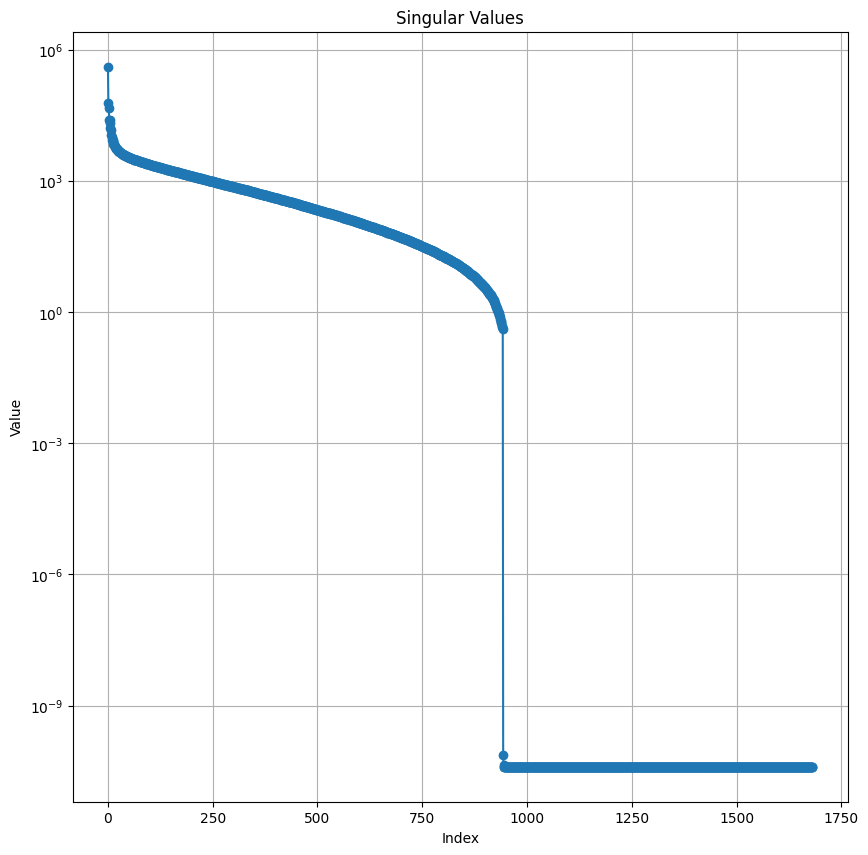

In [18]:
#output/plot separet singular values for movie lens

import matplotlib.pyplot as plt
# plotting the singular values
plt.figure(figsize=(10, 10))
plt.plot(S, marker='o')
plt.title('Singular Values')
plt.xlabel('Index') #gives position of each singular value in the Σ matrix, starting from 0
plt.ylabel('Value') #magnitude of each singular value on a logarithmic scale
plt.yscale('log')
# log scale to see the drop off graph clearly
plt.grid(True)
plt.show()

In [19]:
k_values = range(100, 1001, 100)  # values of k to iterate over
approximations = []  # store the rank-k approximations

for k in k_values:
    if k == 0: continue
    U_k = U[:, :k]  # get the first k columns of U
    S_k_diag = np.diag(S[:k])  # create diagonal matrix from the first k singular values
    VT_k = VT[:k, :]  # get the first k rows of VT

    # calculate the rank-k approximation
    A_k = np.dot(U_k, np.dot(S_k_diag, VT_k))

    approximations.append(A_k)
    print(f"Rank-{k} Approximation of Ag^TAg:\n", A_k)

Rank-100 Approximation of Ag^TAg:
 [[ 6.56942658e+03  1.32100720e+03  8.75379001e+02 ...  8.58908564e-01
   1.14813731e+01  1.07144497e+01]
 [ 1.32100720e+03  1.10948406e+03  3.39163909e+02 ... -2.17402047e-01
   9.14043608e+00  7.02741294e+00]
 [ 8.75379001e+02  3.39163909e+02  5.71063584e+02 ...  4.31649162e-01
  -1.01212743e+00  1.00150595e+01]
 ...
 [ 8.58908564e-01 -2.17402047e-01  4.31649162e-01 ...  1.96933219e-01
  -1.91939418e-03 -5.02875203e-02]
 [ 1.14813731e+01  9.14043608e+00 -1.01212743e+00 ... -1.91939418e-03
   1.79054021e+00  1.15950357e-01]
 [ 1.07144497e+01  7.02741294e+00  1.00150595e+01 ... -5.02875203e-02
   1.15950357e-01  1.92217669e+00]]
Rank-200 Approximation of Ag^TAg:
 [[ 6.99033803e+03  1.31004269e+03  8.80571262e+02 ...  5.78188688e-01
   1.15686920e+01  1.09629761e+01]
 [ 1.31004269e+03  1.26947505e+03  3.22825349e+02 ... -4.36993124e-01
   9.37185313e+00  5.98236232e+00]
 [ 8.80571262e+02  3.22825349e+02  7.13511258e+02 ... -5.02086258e-02
  -2.26528144e

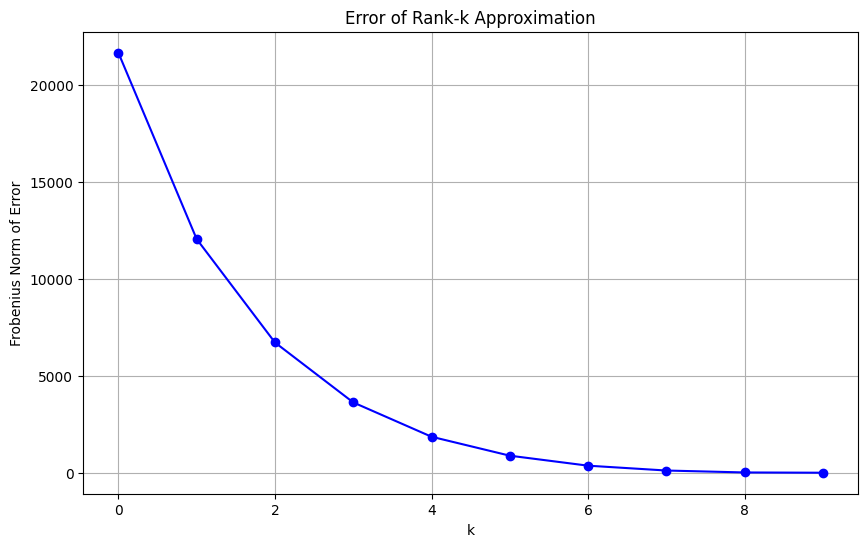

In [20]:
Ag_T_Ag = np.dot(Ag.T, Ag)

# Frobenius norm of the error for each approximation
errors = [np.linalg.norm(Ag_T_Ag - A_k, 'fro') for A_k in approximations]

plt.figure(figsize=(10, 6))
plt.plot(errors, marker='o', linestyle='-', color='blue')  # Skipping the first k=0 as it's not used
plt.title('Error of Rank-k Approximation')
plt.xlabel('k')
plt.ylabel('Frobenius Norm of Error')
plt.grid(True)
plt.show()

In [21]:
noise_mean = 0  #mean of the Gaussian noise
noise_std_dev = 50  #std deviation of the Gaussian noise
rows, columns = np.dot(Ag.T,Ag).shape #Shape of Ag
noise = np.random.normal(noise_mean, noise_std_dev, (rows, columns))
#generating Gaussian noise with the same shape
Ag_noisy = np.dot(Ag.T,Ag) + noise #adding the noise
print("Rank-k Approximation of AgAg^T with Gaussian Noise:\n", Ag_noisy.shape)

Rank-k Approximation of AgAg^T with Gaussian Noise:
 (1682, 1682)


In [22]:
U_noisy, S_noisy, VT_noisy = np.linalg.svd(Ag_noisy)
print("U_noisy:\n", U_noisy)
print("Singular Values:", S_noisy)
print("VT_noisy:\n", VT_noisy)

U_noisy:
 [[-9.59318990e-02  8.63498966e-02 -1.69176284e-02 ...  2.42604290e-02
   1.74408391e-03 -1.46858193e-02]
 [-3.52752962e-02  5.83790134e-03 -6.13395227e-02 ... -3.49231179e-03
   3.81783812e-02  2.77172733e-02]
 [-1.98773790e-02  2.91947955e-02 -1.36787688e-02 ... -3.46315597e-03
   1.74034542e-02 -8.09130213e-03]
 ...
 [-2.45809831e-05  4.20899163e-04 -2.72259965e-04 ...  3.89868522e-02
  -4.64826728e-02 -6.00570364e-02]
 [-4.17761212e-04 -8.54635709e-04 -7.76009882e-04 ...  1.74608761e-02
   1.90565085e-02 -7.87581459e-03]
 [-5.73805578e-05 -1.99295440e-03 -1.20307052e-03 ... -2.23717736e-02
   4.49530112e-03  2.02062595e-02]]
Singular Values: [4.10460498e+05 6.00386183e+04 4.75168050e+04 ... 5.71815782e+00
 2.73256073e+00 1.18137725e+00]
VT_noisy:
 [[-9.57859460e-02 -3.51676127e-02 -1.98566201e-02 ...  1.49948504e-04
  -2.21579131e-04 -4.68692240e-04]
 [ 8.63040881e-02  6.63821341e-03  2.97667397e-02 ...  5.11499408e-04
   5.54069136e-05  3.80448584e-05]
 [-1.63144883e-02 -

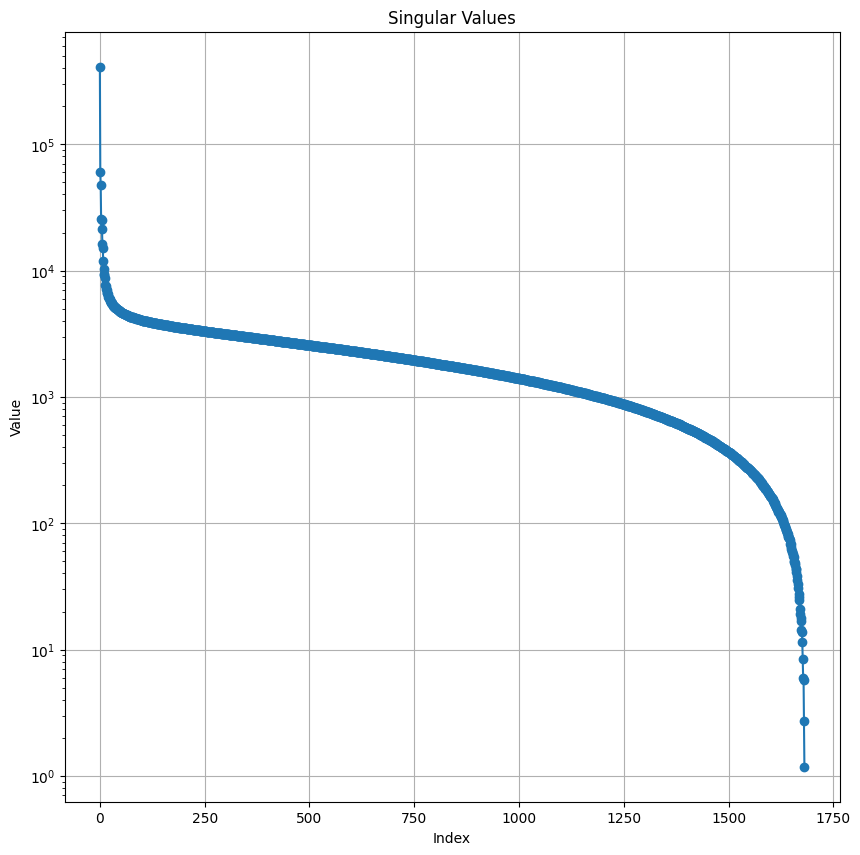

In [23]:
plt.figure(figsize=(10, 10))
plt.plot(S_noisy, marker='o')
plt.title('Singular Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.yscale('log')
plt.grid(True)
plt.show()

In [24]:
k_values = range(100, 1001, 100)
approximations = []
mse_values = []

for k in k_values:
      U_k_noisy = U_noisy[:, :k]
      S_k_diag_noisy = np.diag(S_noisy[:k])
      VT_k_noisy = VT_noisy[:k, :]

      A_k_noisy = np.dot(U_k_noisy, np.dot(S_k_diag_noisy, VT_k_noisy)) #reconstruction

      approximations.append(A_k_noisy)
      mse_k = np.mean((A_k_noisy - A_k) ** 2)
      mse_values.append(mse_k)

      print(f"Rank-{k} MSE: {mse_k}")

      #print(f"Rank-{k} Approximation of Ag^TAg:\n", A_k_noisy)


Rank-100 MSE: 600.5769924264675
Rank-200 MSE: 940.0278716276267
Rank-300 MSE: 1252.093278245116
Rank-400 MSE: 1518.0147370901384
Rank-500 MSE: 1740.650344450644
Rank-600 MSE: 1924.584712652372
Rank-700 MSE: 2074.814129760107
Rank-800 MSE: 2195.252516686191
Rank-900 MSE: 2289.4197580354476
Rank-1000 MSE: 2361.505598485528


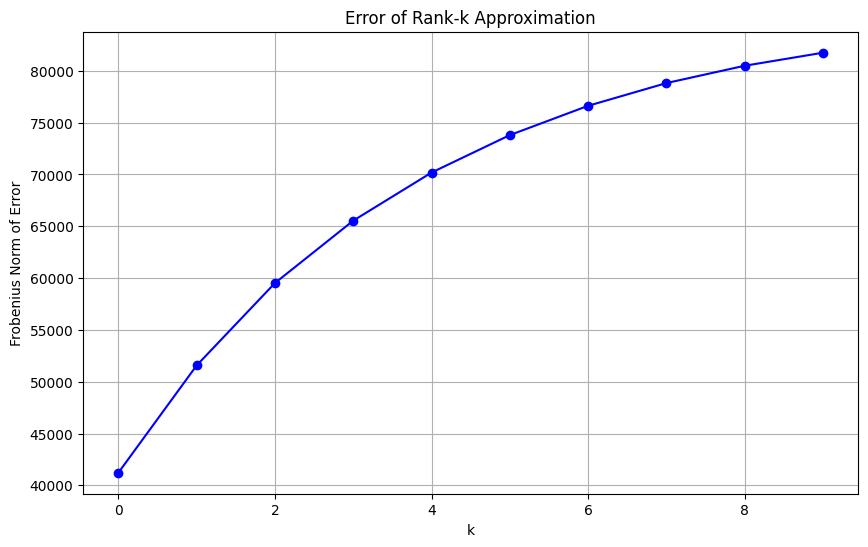

In [25]:
errors = [np.linalg.norm(np.dot(Ag.T,Ag)-A_k_noisy, 'fro') for A_k_noisy in approximations]

plt.figure(figsize=(10, 6))
plt.plot(errors, marker='o', linestyle='-', color='blue')
plt.title('Error of Rank-k Approximation')
plt.xlabel('k')
plt.ylabel('Frobenius Norm of Error')
plt.grid(True)
plt.show()

In [26]:
components_range = range(1, min(Ag.shape[0], Ag.shape[1]), 100)  # practical upper bound is the smaller dimension
utility_scores = []

for d in components_range:
    U_noisy, S_noisy, VT_noisy = np.linalg.svd(Ag_noisy, full_matrices=False)
    U_k_noisy = U_noisy[:, :d]
    S_k_diag_noisy = np.diag(S_noisy[:d])
    VT_k_noisy = VT_noisy[:d, :]

    Ag_reduced = U_k_noisy @ S_k_diag_noisy @ VT_k_noisy

    reconstruction_error = np.linalg.norm(np.dot(Ag.T,Ag) - Ag_reduced, 'fro')
    utility_scores.append(reconstruction_error)


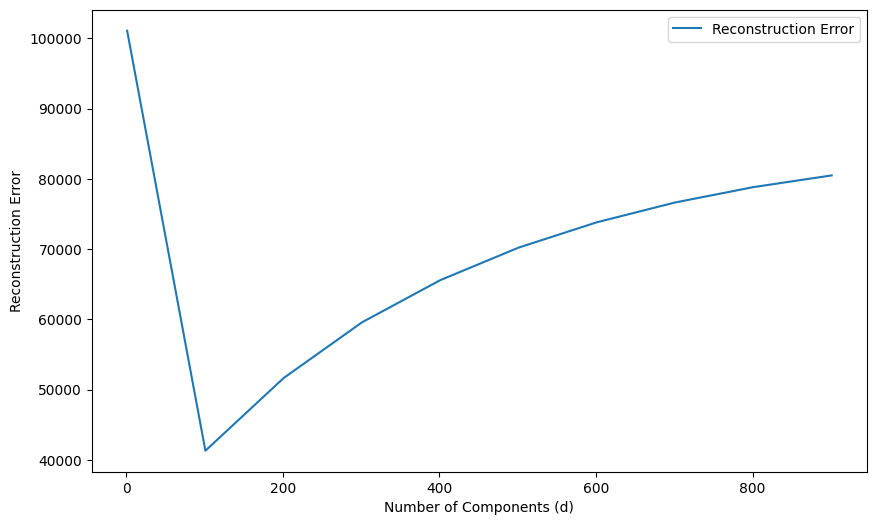

In [27]:

plt.figure(figsize=(10, 6))
plt.plot(components_range, utility_scores, label='Reconstruction Error')
plt.xlabel('Number of Components (d)')
plt.ylabel('Reconstruction Error')
plt.legend()
plt.title('')
plt.show()


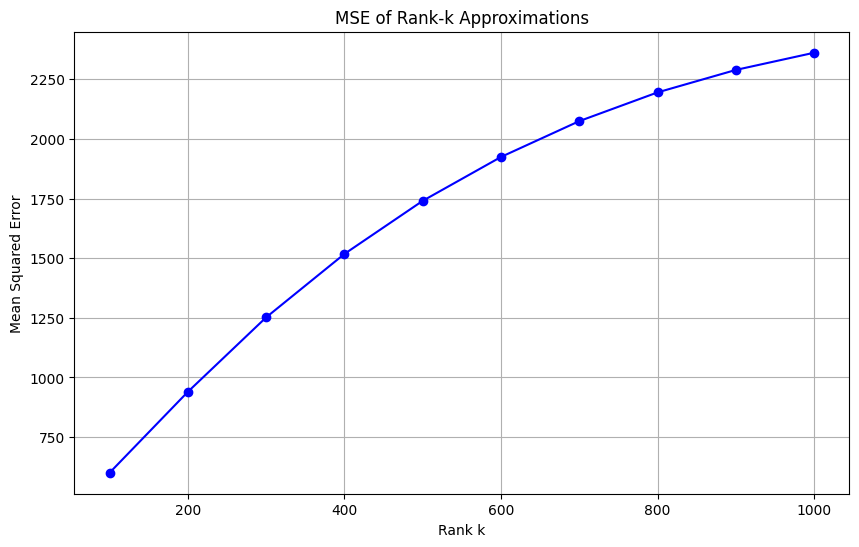

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(list(k_values), mse_values, marker='o', linestyle='-', color='blue')
plt.title('MSE of Rank-k Approximations')
plt.xlabel('Rank k')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()


In [59]:
k_values

range(0, 1001, 100)

In [ ]:
np.random.seed(0)  # reproducibility purpose

def randomized_response(matrix, flip_prob=0.2):
    # random matrix generated of the same shape as Ag
    random_noise = np.random.rand(*matrix.shape)

    # flip sign with the probability 'flip_prob'
    flipped_matrix = np.where(random_noise < flip_prob, -matrix, matrix)
    return flipped_matrix

# apply randomized response
Ag_randomized = randomized_response(Ag)

In [ ]:
#implement Paper's Techniques for Incoherent Matrices
def apply_gaussian_noise(matrix, sigma=1.0):
    # gaussian noise addition
    noise = np.random.normal(0, sigma, matrix.shape)
    noisy_matrix = matrix + noise
    return noisy_matrix

Ag_noisy = apply_gaussian_noise(Ag)

In [ ]:
from sklearn.metrics import mean_squared_error
#evaluate reconstruction error
mse_randomized = mean_squared_error(Ag, Ag_randomized)
mse_noisy = mean_squared_error(Ag, Ag_noisy)

print(f"MSE for Randomized Response: {mse_randomized}")
print(f"MSE for Advanced Technique: {mse_noisy}")


MSE for Randomized Response: 0.691322126993694
MSE for Advanced Technique: 0.9996518769738097
